In [40]:
!pip install PyDrive


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
from pydrive.auth import GoogleAuth
auth.authenticate_user()
gauth = GoogleAuth()


In [0]:

drive = GoogleDrive(gauth)


In [0]:
gauth.credentials = GoogleCredentials.get_application_default()

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1VQAVI_UYE3j4QJWUU5YVNkInFQEsLlxm'})

In [0]:
download.GetContentFile('DOWNLOAD.json')

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [0]:
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [0]:
df=pd.read_json('DOWNLOAD.json', lines=True)

In [52]:
df1=df
df2=df
df

,accessedResources,adblockerStatus,aid,browser,browserId,city,content,contentAuthor,contentCreated,contentSection,country,countryCode,customParamList,customParams,dmaCode,fingerprint,globalBrowserId,hasAccess,hour,ip,isFirstVisit,isNewVisit,newsletter,node,operatingSystem,originalUrl,pageSessionId,pageViewId,parsedReferrer,parsedReferrerId,platform,rawReferrer,rawUserAgent,referrerSegment,referrerSegmentId,region,resourceIds,sailthruCookie,source,submissionCount,submitType,tags,timezoneOffset,uid,unixTimestamp,url,userAgent,visitId
0,[],0,XXXX,chrome,s8naARjQgOi9xyxeDMezpQ==,Cathedral City,"{'id': '', 'keywords': '', 'title': '/qf0MwC39...",qhFnfSN7LCtDX9feysDXrQ==,2016-08-23 15:54:02 UTC,quotes,United States,US,[],{},804,QGYBnp2Arl6ENY0GCvXGiQ==,s8naARjQgOi9xyxeDMezpQ==,0,0,Z7LVkebF4l68qGYx8NqVCg==,False,0.0,0,XXXX,windows,2tmz5ZrQFaCab5FQSNRymw==,c6YWP24XlJCPlmEAqJ9VpQ==,NMW7pBwkiHySvAzulqUicQ==,self,11,desktop,yUJEsZZQGp9Wn2CRa7soxw==,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,internal,4,California,[],XXXX,composer,1,auto,[],-480,eFbmpJs3m4DilH0ieBqfjQ==,2018-12-01 00:00:00.014 UTC,6cmJHqYgtD7t5a0+oGLKrw==,dwc,epKCqTEn23Hzv4ux1+rRGg==
1,[],0,XXXX,ie,of7oLRZiSEWz2HxzyfFV6Q==,San Diego,"{'id': '', 'keywords': 'mad money, xi jinping,...",16XTT4UJTzbCa5AnaKmtgQ==,2018-11-30 23:20:41 UTC,Mad Money,United States,US,[],{},825,61cy5MqOEuB0rd0B8VUpCw==,of7oLRZiSEWz2HxzyfFV6Q==,0,0,A7PqwBismGCYiDFg3MjfYg==,False,0.0,0,XXXX,windows,dEfOazUgejkY9INnbg+4rQ==,S76dsxrvjzVaw0BOL8w2HA==,JjN0JkYVkR5HPO063gFlXw==,self,11,desktop,w2l8mlrP0fpv8jaDnOLIEg==,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,internal,4,California,[],XXXX,composer,1,auto,[],-480,eFbmpJs3m4DilH0ieBqfjQ==,2018-12-01 00:00:00.017 UTC,i/sNkL7DPVAk/6ZrZYgI5A==,dwi,SDS1ZZi0IwQirrj87f5QZQ==
2,[],0,XXXX,misc,V31r7/zlPytyE3sUN3Z4hA==,Brooklyn,"{'id': '', 'keywords': 'at work, leadership, c...",izzD7bDOhnwEE4GEC++AsA==,2018-08-28 13:50:14 UTC,At Work,United States,US,[],{},501,0GHj5Bt9Lbc38pZJF+bQCQ==,V31r7/zlPytyE3sUN3Z4hA==,0,0,0wrjci5hzxWPl+mcLwk5lw==,True,1.0,0,XXXX,ios,JZ4KhcQhO0a5Y37rOm7ZFw==,sTwjSW4gKieX3Hl1d/ujSA==,g2Nqdgva9680KGTj98ILOg==,other,12,mobile,RUYD/Vd040whQ0U3L/Tjfg==,Mozilla/5.0 (iPhone; CPU iPhone OS 12_1 like M...,external,3,New York,[],XXXX,composer,1,auto,[],-300,eFbmpJs3m4DilH0ieBqfjQ==,2018-12-01 00:00:00.031 UTC,RtD9BZjjgIHlXTTlX2rzFg==,mim,VDeprRCrVjrm0tKgQr5Ljg==
3,[],0,XXXX,chrome,yJYK5oV8m86RBPuBoLRCkg==,Irvine,"{'id': '', 'keywords': 'business news', 'title...",1B2M2Y8AsgTpgAmY7PhCfg==,NaN,,United States,US,[],{},803,Vzb5dfmOs5pRRvlFjyD53g==,yJYK5oV8m86RBPuBoLRCkg==,0,0,K2GuyjUzoO6bE32nD1/mTQ==,False,0.0,0,XXXX,windows,DGC6UadHekUpwtX/62d/KQ==,NvaxrUcAhhiRBAHN9+ySwg==,Zv+ljqmzaQmksv04JVLXwQ==,self,11,desktop,ErNe0HcfyHKwJCDnNnBM3Q==,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,internal,4,California,[],XXXX,composer,1,auto,[],-480,eFbmpJs3m4DilH0ieBqfjQ==,2018-12-01 00:00:00.049 UTC,ErNe0HcfyHKwJCDnNnBM3Q==,dwc,yBe9NTZO043gn5xXSnXXcQ==
4,[],-1,XXXX,firefox,g0//jXfqg+jhE8DspZccHA==,Sylmar,"{'id': '', 'keywords': 'politics,trade,busines...",1B2M2Y8AsgTpgAmY7PhCfg==,NaN,,United States,US,[],{},803,aamHT4DaX20+xclkJsjqRQ==,g0//jXfqg+jhE8DspZccHA==,0,0,TEtNiLlrTwG2sXKqRPVSEQ==,False,0.0,0,XXXX,windows,pTRsRgs7BGW79oln4+IApA==,mNznRGbE6o5XhNY7fRgKhw==,G0/UtyoybC1LyIrr7QAPSw==,none,13,desktop,2iu9I2HkRim3Dk3gBSXrow==,Mozilla/5.0 (Windows NT 6.3; Win64; x64; rv:63...,direct,2,California,[],XXXX,composer,2,manual,[],-480,eFbmpJs3m4DilH0ieBqfjQ==,2018-12-01 00:00:00.122 UTC,eDzoHiUpRcfiOFYQtRvz1w==,dwf,TN5kiq+OaUyn0/UHZnUQRA==
5,[],0,XXXX,safari,tGKQ8Fo+bU2355xDa9Bo2w==,Wilmington,"{'id': '', 'keywords': 'some homepage, stock m...",1B2M2Y8AsgTpgAmY7PhCfg==,2013-07-12 14:06:54 UTC,US Homepage,United States,US,[],{},504,5Q6j5rJgUPDI4yDzVQiD4Q==,tGKQ8Fo+bU2355xDa9Bo2w==,0,0,o7XIWWPBSeyOw5tr5LgmLg==,True,1.0,0,XXXX,mac,FttRNoFDypsl62CXWFmlqw==,wgqZau2caECgO9nDn96HIg==,dQomBvxXEClBtTwTr17b2w==,none,13,desktop,2iu9I2HkRim3Dk3gBSXrow==,Mozilla/5.0 (

In [53]:
df['unixTimestamp']=(pd.to_datetime(df['unixTimestamp']))

df['d'] = df['unixTimestamp'].dt.day
df = df.groupby(['d','browserId'])['unixTimestamp'].count().reset_index(name="freq")

result = df[df.freq >= 2]

# only user ids matching criteria
user_ids = result.browserId.tolist()
print(user_ids)
retention = df1['browserId'].isin(user_ids)
df1['Ret'] = '0'
df1['Ret']=retention
dfpure=df1.drop_duplicates(subset=['browserId'], keep='first')
dfpure.groupby(['Ret']).sum()
dfpure=df1.drop_duplicates(subset=['browserId'], keep='first')
dfpure.drop(dfpure.loc[dfpure['isFirstVisit']==False].index, inplace=True)

['++08IID6E76xTbTzv8gdCw==', '++0ql4dIZ6xbkzzqjvwZ4A==', '++3lgWXXBPur+fZplfJccg==', '++9ElSuMHjMPzRa1C4WuRA==', '++HEkBlWuIQlkp/hfXDJ9w==', '++JFZh2tKko9PuB+InNG3w==', '++g1c0bhDNZV1iiJtkAKYA==', '++gmnmkAVBzmpDkDeww87w==', '++v3rZ/87Xq6KbbARqC1oQ==', '+/5c9LaF5I101echGA6SJw==', '+/I/q7sBxn2jJjhC/4a7vA==', '+/LA928OlJT6VRLd34BhDQ==', '+/M15caGii1t1BXagurvRw==', '+/Md2UxKm27JVuqFn7tnZg==', '+/P04n1KLiZr/bG74taHLw==', '+/P9shIzNgFObJNu3JNssw==', '+/c3jeG/Qdn08ORSCyzg/g==', '+/dOncDhx8YEQZ4XZ8p9cA==', '+/jrhGCf4T+GjbLvl21ajA==', '+/wB+A0kJ71v7GZN/T9ZMA==', '+02WXqSnY/csUmw8Uq+/Tg==', '+07FZ3OTOBHBILKm2wW3/A==', '+0FKqlA4OnGbfTAxysu8mw==', '+0He7tbKRqtvTlHtkhtySw==', '+0Wa34eO8PMexPiVWiLDWg==', '+0cHQHV5pQCO9v9sfszZMw==', '+0cXSMtxjBRskSvHJh4UTQ==', '+0gYX/rElRfkOwaSedzKLQ==', '+0mFFraztusrcUKb4APtmQ==', '+0myJicU7StBktpC8/9ECw==', '+0ng7ibxuEAe596qV1rXKw==', '+0oXt/kW71v9I10q3xErMw==', '+0wbA1efeD93EjmIsJ9Pzw==', '+106PilofqngIapDSSVElw==', '+11wBTfF7HzmpW1Zn1/U2Q==', '+14ICyydRXhhYHP6GL

In [0]:
retention = df1['browserId'].isin(user_ids)
df1['Ret'] = '0'


In [0]:
df1['Ret']=retention

In [0]:
dfpure=df1.drop_duplicates(subset=['browserId'], keep='first')

In [57]:
dfpure.groupby(['Ret']).sum()

,adblockerStatus,dmaCode,hasAccess,hour,isFirstVisit,isNewVisit,newsletter,parsedReferrerId,referrerSegmentId,submissionCount,timezoneOffset,d
Ret,,,,,,,,,,,,
False,6215,36692245,6,0,35694.0,77078.0,878,685851,157347,81457,-24904275,81145
True,-1153,18312028,13,0,9222.0,33738.0,797,384575,89390,37830,-10091490,37613


In [58]:
dfpure

,accessedResources,adblockerStatus,aid,browser,browserId,city,content,contentAuthor,contentCreated,contentSection,country,countryCode,customParamList,customParams,dmaCode,fingerprint,globalBrowserId,hasAccess,hour,ip,isFirstVisit,isNewVisit,newsletter,node,operatingSystem,originalUrl,pageSessionId,pageViewId,parsedReferrer,parsedReferrerId,platform,rawReferrer,rawUserAgent,referrerSegment,referrerSegmentId,region,resourceIds,sailthruCookie,source,submissionCount,submitType,tags,timezoneOffset,uid,unixTimestamp,url,userAgent,visitId,d,Ret
0,[],0,XXXX,chrome,s8naARjQgOi9xyxeDMezpQ==,Cathedral City,"{'id': '', 'keywords': '', 'title': '/qf0MwC39...",qhFnfSN7LCtDX9feysDXrQ==,2016-08-23 15:54:02 UTC,quotes,United States,US,[],{},804,QGYBnp2Arl6ENY0GCvXGiQ==,s8naARjQgOi9xyxeDMezpQ==,0,0,Z7LVkebF4l68qGYx8NqVCg==,False,0.0,0,XXXX,windows,2tmz5ZrQFaCab5FQSNRymw==,c6YWP24XlJCPlmEAqJ9VpQ==,NMW7pBwkiHySvAzulqUicQ==,self,11,desktop,yUJEsZZQGp9Wn2CRa7soxw==,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,internal,4,California,[],XXXX,composer,1,auto,[],-480,eFbmpJs3m4DilH0ieBqfjQ==,2018-12-01 00:00:00.014000+00:00,6cmJHqYgtD7t5a0+oGLKrw==,dwc,epKCqTEn23Hzv4ux1+rRGg==,1,True
1,[],0,XXXX,ie,of7oLRZiSEWz2HxzyfFV6Q==,San Diego,"{'id': '', 'keywords': 'mad money, xi jinping,...",16XTT4UJTzbCa5AnaKmtgQ==,2018-11-30 23:20:41 UTC,Mad Money,United States,US,[],{},825,61cy5MqOEuB0rd0B8VUpCw==,of7oLRZiSEWz2HxzyfFV6Q==,0,0,A7PqwBismGCYiDFg3MjfYg==,False,0.0,0,XXXX,windows,dEfOazUgejkY9INnbg+4rQ==,S76dsxrvjzVaw0BOL8w2HA==,JjN0JkYVkR5HPO063gFlXw==,self,11,desktop,w2l8mlrP0fpv8jaDnOLIEg==,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,internal,4,California,[],XXXX,composer,1,auto,[],-480,eFbmpJs3m4DilH0ieBqfjQ==,2018-12-01 00:00:00.017000+00:00,i/sNkL7DPVAk/6ZrZYgI5A==,dwi,SDS1ZZi0IwQirrj87f5QZQ==,1,True
2,[],0,XXXX,misc,V31r7/zlPytyE3sUN3Z4hA==,Brooklyn,"{'id': '', 'keywords': 'at work, leadership, c...",izzD7bDOhnwEE4GEC++AsA==,2018-08-28 13:50:14 UTC,At Work,United States,US,[],{},501,0GHj5Bt9Lbc38pZJF+bQCQ==,V31r7/zlPytyE3sUN3Z4hA==,0,0,0wrjci5hzxWPl+mcLwk5lw==,True,1.0,0,XXXX,ios,JZ4KhcQhO0a5Y37rOm7ZFw==,sTwjSW4gKieX3Hl1d/ujSA==,g2Nqdgva9680KGTj98ILOg==,other,12,mobile,RUYD/Vd040whQ0U3L/Tjfg==,Mozilla/5.0 (iPhone; CPU iPhone OS 12_1 like M...,external,3,New York,[],XXXX,composer,1,auto,[],-300,eFbmpJs3m4DilH0ieBqfjQ==,2018-12-01 00:00:00.031000+00:00,RtD9BZjjgIHlXTTlX2rzFg==,mim,VDeprRCrVjrm0tKgQr5Ljg==,1,False
3,[],0,XXXX,chrome,yJYK5oV8m86RBPuBoLRCkg==,Irvine,"{'id': '', 'keywords': 'business news', 'title...",1B2M2Y8AsgTpgAmY7PhCfg==,NaN,,United States,US,[],{},803,Vzb5dfmOs5pRRvlFjyD53g==,yJYK5oV8m86RBPuBoLRCkg==,0,0,K2GuyjUzoO6bE32nD1/mTQ==,False,0.0,0,XXXX,windows,DGC6UadHekUpwtX/62d/KQ==,NvaxrUcAhhiRBAHN9+ySwg==,Zv+ljqmzaQmksv04JVLXwQ==,self,11,desktop,ErNe0HcfyHKwJCDnNnBM3Q==,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,internal,4,California,[],XXXX,composer,1,auto,[],-480,eFbmpJs3m4DilH0ieBqfjQ==,2018-12-01 00:00:00.049000+00:00,ErNe0HcfyHKwJCDnNnBM3Q==,dwc,yBe9NTZO043gn5xXSnXXcQ==,1,True
4,[],-1,XXXX,firefox,g0//jXfqg+jhE8DspZccHA==,Sylmar,"{'id': '', 'keywords': 'politics,trade,busines...",1B2M2Y8AsgTpgAmY7PhCfg==,NaN,,United States,US,[],{},803,aamHT4DaX20+xclkJsjqRQ==,g0//jXfqg+jhE8DspZccHA==,0,0,TEtNiLlrTwG2sXKqRPVSEQ==,False,0.0,0,XXXX,windows,pTRsRgs7BGW79oln4+IApA==,mNznRGbE6o5XhNY7fRgKhw==,G0/UtyoybC1LyIrr7QAPSw==,none,13,desktop,2iu9I2HkRim3Dk3gBSXrow==,Mozilla/5.0 (Windows NT 6.3; Win64; x64; rv:63...,direct,2,California,[],XXXX,composer,2,manual,[],-480,eFbmpJs3m4DilH0ieBqfjQ==,2018-12-01 00:00:00.122000+00:00,eDzoHiUpRcfiOFYQtRvz1w==,dwf,TN5kiq+OaUyn0/UHZnUQRA==,1,True
5,[],0,XXXX,safari,tGKQ8Fo+bU2355xDa9Bo2w==,Wilmington,"{'id': '', 'keywords': 'some homepage, stock m...",1B2M2Y8AsgTpgAmY7PhCfg==,2013-07-12 14:06:54 UTC,US Homepage,United States,US,[],{},504,5Q6j5rJgUPDI4yDzVQiD4Q==,tGKQ8Fo+bU2355xDa9Bo2w==,0,0,o7XIWWPBSeyOw5tr5LgmLg==,True,1.0,0,XXXX,mac,FttRNoFDypsl62CXWFmlqw==,wgqZau2caECgO9nDn96HIg==,dQomBvxXEClB

In [59]:
pd.isna(dfpure).sum() #counting NaN 

accessedResources        0
adblockerStatus          0
aid                      0
browser                  0
browserId                0
city                  9161
content                  0
contentAuthor            0
contentCreated       16870
contentSection           0
country                  0
countryCode             64
customParamList          0
customParams             0
dmaCode                  0
fingerprint              0
globalBrowserId          0
hasAccess                0
hour                     0
ip                       0
isFirstVisit             0
isNewVisit               1
newsletter               0
node                     0
operatingSystem          0
originalUrl              0
pageSessionId            0
pageViewId               0
parsedReferrer           0
parsedReferrerId         0
platform                 0
rawReferrer              0
rawUserAgent             0
referrerSegment          0
referrerSegmentId        0
region                9984
resourceIds              0
s

In [0]:
dfauth=dfpure.groupby('contentAuthor').sum()

In [61]:
# sorting w.r.t name column 
dfauth.sort_values("isNewVisit", na_position = 'last') 
dfauth.iloc[::-1]
dfauth

,adblockerStatus,dmaCode,hasAccess,hour,isFirstVisit,isNewVisit,newsletter,parsedReferrerId,referrerSegmentId,submissionCount,timezoneOffset,d,Ret
contentAuthor,,,,,,,,,,,,,
+9o9hW76vjAM3iA6sAvXzg==,22,41243,0,0,44.0,106.0,3,729,187,108,-19320,108,22.0
+AjH5P4L3Sv5cwBxIBKQpw==,0,533,0,0,1.0,1.0,0,13,2,1,-300,1,0.0
+BZ7ADCaYCjQ4EuT4wH85Q==,0,0,0,0,1.0,1.0,0,13,2,1,-480,1,0.0
+JIx4Nypl123rOsgL8OUfA==,0,511,0,0,1.0,1.0,0,0,1,1,-480,1,0.0
+LPoTJVM7x71DHvtKeZ9mg==,-1,0,0,0,1.0,2.0,0,26,4,2,-780,2,1.0
+OtGNi+Wkf59pjgnFiRcFg==,1,2174,0,0,14.0,17.0,0,186,32,17,-4500,17,2.0
+RNdDJO2dnpF0AF9wgOb4g==,0,0,0,0,1.0,1.0,0,12,3,1,60,1,0.0
+VpaBcaysFqukfCrx0ikuA==,4,4867,0,0,15.0,22.0,0,184,39,22,-7320,22,2.0
+W3f19tjEwAw7z/6ILfBzw==,0,0,0,0,1.0,1.0,0,13,2,1,-420,1,0.0


In [0]:
dfpure.drop(dfpure.loc[dfpure['isFirstVisit']==False].index, inplace=True)

In [0]:
import featuretools as ft

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [66]:
df_majority = dfpure[dfpure['Ret']==False] #balancing our dataset
df_minority = dfpure[dfpure['Ret']==True]
# Upsample minority class

from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=35694, random_state=123)   
df_up = pd.concat([df_majority, df_minority_upsampled])
df_up['Ret'].value_counts()

True     35694
False    35694
Name: Ret, dtype: int64

In [0]:
X = df_up['contentAuthor']
Y = df_up['Ret']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
cvec = CountVectorizer(stop_words='english').fit(X_train)
df_train=pd.DataFrame(cvec.transform(X_train).todense(), columns=cvec.get_feature_names())
df_test=pd.DataFrame(cvec.transform(X_test).todense(), columns=cvec.get_feature_names())
a_train=pd.DataFrame(cvec.transform(X_train).todense(), columns=cvec.get_feature_names())

In [68]:
lr = LogisticRegression(penalty='l1')
lr.fit(df_train, Y_train)
lr.score(df_test, Y_test)

0.6260452481005137

In [69]:
lr = LogisticRegression()
lr.fit(df_train, Y_train)
lr.score(df_test, Y_test)


0.6290165117364913

In [70]:
pd.get_dummies(dfpure['contentAuthor'])

,+9o9hW76vjAM3iA6sAvXzg==,+AjH5P4L3Sv5cwBxIBKQpw==,+BZ7ADCaYCjQ4EuT4wH85Q==,+JIx4Nypl123rOsgL8OUfA==,+LPoTJVM7x71DHvtKeZ9mg==,+OtGNi+Wkf59pjgnFiRcFg==,+RNdDJO2dnpF0AF9wgOb4g==,+VpaBcaysFqukfCrx0ikuA==,+W3f19tjEwAw7z/6ILfBzw==,+WPJFq8fM/AiXH6bWl38uA==,+ZqYhWFW3wI5KenFV/OYAA==,+b9i3zvRPHWzBnmTOfmhqw==,+blLmk+s2fCNHBc088yAew==,+fiuZdtipJpKb16VJlW4ow==,+fr7QezbyuXNEacMaSWpbA==,+iF68Bgte0Q+5eH0T1A68g==,+jzn9Vr6IDFbGB5rF3yN/Q==,+kZzZnYNFTFJeo5h1EUg7g==,+scuBXXce8ykgIf3NlVFkQ==,+ugVRX2Ib2/l9rav3fzwhA==,+zP2DxWQTEyRRJkARQS86A==,/+HRUzT6xb3Wd/KoPKUt0Q==,//IWnV7aPEyDLFucPISamQ==,/1FbE1H/0jo8WaJfVsH2QA==,/4TO1BCyRh65iklqdLtnaQ==,/8h4Wf/a2mtddz4gTnwQaw==,/8l8YiCsyPWMkKKG35hnpw==,/A0SnGvr3xd2f5hBkx1ZLg==,/GO/+S3miZ8DEpevW+CVDQ==,/HJL8nUMZu4sxohYuskp8Q==,/NGGo4gMuZMQE3tuvgzttg==,/SgfmexVSHFJwnSZNhB4Ig==,/T2rjwf1RGiFZgM0HbFJGw==,/VIwHJ9lcnG/wqr4N2r1Vw==,/VqPSnte5LVRWgqIp2kAtA==,/W1YptieosjcF0UN5n62+g==,/Y9vNyLAdtz/xRYBsWBTHQ==,/bhLjtP91OHyxI+S5GsbJQ==,/e9fHFhIR8nh4mGsKuG6pA==,/kZAytLQrjADIJJ+AqPN6g==,...,xhgFoABc/nKNSjrHmCNZXg==,xr+XGqymgN92EsvcP5dyVw==,xty5ho5BW9JDxUzpmSV9+A==,xuKucy1oVnVPwF6Yi6OzMQ==,xwOfSpeKmxN4Mkp8wVet4w==,xz+M26YEPtD9ydwvfeV4pA==,y+xoxX+gmwxIGANhn3l3zA==,y/d/pcVh+hiUKde3Ev5pww==,y1iJJ8OHnfm0lzw4qzFPhw==,yA96zm/O7ewq/JYc3BTilA==,yBG2LtBZ3M7aroknuF0o7w==,yJ3SD5aDJtDL2oL57XTNlw==,yTIlYxpO+v+PMPXmGlXOkA==,yXuiNKOEJ+T8rTA6jbwVlw==,yZnt3PG6YAGJR+/6Q3IySg==,yiMDQ1HmpYMYp5maH/UMpA==,ykpDXee8u7f0OZvM4sygzg==,yo3/5hLPF4ti8d6a+1Hb6w==,yohP3f02oCBE0OUtICtodg==,youtU+OoLXGRccQ6BfWScg==,z/9u5rxVZUm/hVjFq+x9xg==,z8acicSOyBpnBv+zafgl0Q==,zD7lEgGK0mNDbIltkZTvIQ==,zL8IzS9fexXPTuk0z2qY/w==,zPNKzLYoM9tiduosjKKqeQ==,zQAgfwNRi3Z3/23bhpw4DQ==,zQKNnbEL+EOdUN2klNMNxw==,zQTkbd0a0ZZ5lQ1+uBFQ/A==,zTNR/S8rmQ0ymZ9HGXx6eQ==,zU66r2nyF6ZFiTDYibmeMg==,zW+pQLGUAMOLi3kjY0fZ8g==,zWerEEHdkS9+IQD48Kx3Mw==,zYXi576jsD6MbE6AUDAdaw==,zhwX/IWl3I/zVoW2ZnDprg==,zie8WhDeSsSCIVOEiYJjGg==,zn78KNG8JL9fJP+UUvXgBw==,znIVIyCjW21WbiPR2maBjA==,znbKLoiZObZLz81pEJMIGQ==,zsQhmJy0lgh3YDdr4X60uA==,zzz0PM+HgyC3oc4e1F+eIg==
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
dfna=dfpure.dropna()
dfna

,accessedResources,adblockerStatus,aid,browser,browserId,city,content,contentAuthor,contentCreated,contentSection,country,countryCode,customParamList,customParams,dmaCode,fingerprint,globalBrowserId,hasAccess,hour,ip,isFirstVisit,isNewVisit,newsletter,node,operatingSystem,originalUrl,pageSessionId,pageViewId,parsedReferrer,parsedReferrerId,platform,rawReferrer,rawUserAgent,referrerSegment,referrerSegmentId,region,resourceIds,sailthruCookie,source,submissionCount,submitType,tags,timezoneOffset,uid,unixTimestamp,url,userAgent,visitId,d,Ret
2,[],0,XXXX,misc,V31r7/zlPytyE3sUN3Z4hA==,Brooklyn,"{'id': '', 'keywords': 'at work, leadership, c...",izzD7bDOhnwEE4GEC++AsA==,2018-08-28 13:50:14 UTC,At Work,United States,US,[],{},501,0GHj5Bt9Lbc38pZJF+bQCQ==,V31r7/zlPytyE3sUN3Z4hA==,0,0,0wrjci5hzxWPl+mcLwk5lw==,True,1.0,0,XXXX,ios,JZ4KhcQhO0a5Y37rOm7ZFw==,sTwjSW4gKieX3Hl1d/ujSA==,g2Nqdgva9680KGTj98ILOg==,other,12,mobile,RUYD/Vd040whQ0U3L/Tjfg==,Mozilla/5.0 (iPhone; CPU iPhone OS 12_1 like M...,external,3,New York,[],XXXX,composer,1,auto,[],-300,eFbmpJs3m4DilH0ieBqfjQ==,2018-12-01 00:00:00.031000+00:00,RtD9BZjjgIHlXTTlX2rzFg==,mim,VDeprRCrVjrm0tKgQr5Ljg==,1,False
5,[],0,XXXX,safari,tGKQ8Fo+bU2355xDa9Bo2w==,Wilmington,"{'id': '', 'keywords': 'some homepage, stock m...",1B2M2Y8AsgTpgAmY7PhCfg==,2013-07-12 14:06:54 UTC,US Homepage,United States,US,[],{},504,5Q6j5rJgUPDI4yDzVQiD4Q==,tGKQ8Fo+bU2355xDa9Bo2w==,0,0,o7XIWWPBSeyOw5tr5LgmLg==,True,1.0,0,XXXX,mac,FttRNoFDypsl62CXWFmlqw==,wgqZau2caECgO9nDn96HIg==,dQomBvxXEClBtTwTr17b2w==,none,13,desktop,2iu9I2HkRim3Dk3gBSXrow==,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_1...,direct,2,Delaware,[],XXXX,composer,1,auto,[],-300,eFbmpJs3m4DilH0ieBqfjQ==,2018-12-01 00:00:00.153000+00:00,w2l8mlrP0fpv8jaDnOLIEg==,dms,9IY1hZo3emSBdUoaktC4nQ==,1,True
8,[],0,XXXX,firefox,V7cbr/CGfSDsUYYzfIuFBA==,Newburgh,"{'id': '', 'keywords': 'autos, transportation,...",RAQgyv0WJMgHXF6Y0Oz0dQ==,2018-11-29 12:51:34 UTC,Autos,United States,US,[],{},501,0YDnpxkhXw6rlcBTAv8ZMA==,V7cbr/CGfSDsUYYzfIuFBA==,0,0,C5Q+5hDhAdeHZFWAhK7Qhg==,True,1.0,0,XXXX,windows,9yacwMKm05Gpo7F2hVybSg==,mIG/drVH9LWrFwcHpZOqyA==,M5zza7nJp0tXcB9C3VgAgw==,yahoo,6,desktop,lthjOx7eGoMJZJzQ9lZZQg==,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...,search,1,New York,[],XXXX,composer,1,auto,[],-300,eFbmpJs3m4DilH0ieBqfjQ==,2018-12-01 00:00:00.187000+00:00,+XywM7s92fqE5q83qzgHyw==,dwf,WOg5ssN7R7qLOpvpP7SmxA==,1,False
10,[],0,XXXX,chrome,kOH6c1scBdi9ASxtPwhXdw==,Atlanta,"{'id': '', 'keywords': 'health & science, jeni...",na6x+0883ollDRK6pHrqcg==,2018-11-30 22:15:14 UTC,Health & Science,United States,US,[],{},524,3QjDVQWl6DLBEDDwxvkT/w==,kOH6c1scBdi9ASxtPwhXdw==,0,0,BK46J6V5RzFE9b3FwkF1nQ==,True,1.0,0,XXXX,windows,t5pbqkBdBky8TzfOEzvd5Q==,c//ce6qEBGoFeM5dO/wAaQ==,AQT/ri1onAhQ0VByj8Eppw==,none,13,desktop,2iu9I2HkRim3Dk3gBSXrow==,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,direct,2,Georgia,[],XXXX,composer,1,auto,[],-300,eFbmpJs3m4DilH0ieBqfjQ==,2018-12-01 00:00:00.232000+00:00,o8RUF9UDYY/iOj3MmtUN3Q==,dwc,y/G0bFUEGoJY5M8L8nLb0A==,1,False
11,[],0,XXXX,chrome,fIzTAi8E6n2Vqz6Pc1es2w==,Outlook,"{'id': '', 'keywords': 'enterprise, investment...",ojEJJ61bWD0x2eE2iZN1sg==,2018-11-30 20:25:53 UTC,Enterprise,United States,US,[],{},810,5LJpHT3yHO9g8PWNAl1uMQ==,fIzTAi8E6n2Vqz6Pc1es2w==,0,0,d3y6J8BjF+Nf4mvbCG59zQ==,True,1.0,0,XXXX,android,nVGw2mlyNMQpF8X6VLv42w==,auwWzTYm6Is6WF4TJCtNNw==,BB6uF9a81WXPAhztFFGCiw==,drudgereport,7,mobile,m0lwQ56ud9I9kfz6qcU1Sw==,Mozilla/5.0 (Linux; Android 9; Pixel 2 XL) App...,external,3,Washington,[],XXXX,composer,1,auto,[],-480,eFbmpJs3m4DilH0ieBqfjQ==,2018-12-01 00:00:00.249000+00:00,au113aAwRc2HHR5TwNtGzg==,mac,OsJnvCHVaYy9C/Eq2c9J6w==,1,False
12,[],0,XXXX,safari,tJMeA6fDBeoVUoFtOYaEsw==,Tinley Park,"{'id': '', 'keywords': 'hotels restaurants and...",qhFnfSN7LCtDX9feysDXrQ==,2018-11-30 11:14:17 UTC,Hotels Restaurants and Leisure,United States,US,[],{},602,JLypTMdf2DyMCG2dh54LQg==,tJMeA6fDBeoVUoFtOYaEsw==,0,0,ENN90+0OecqCJYoiJb6KWA==,True

Confusion matrix, without normalization
[[7386 4463]
 [4276 7434]]
Normalized confusion matrix
[[0.62 0.38]
 [0.37 0.63]]


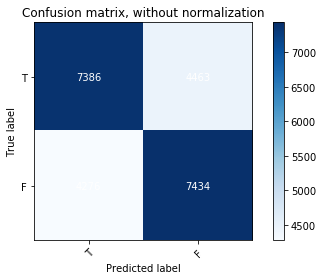

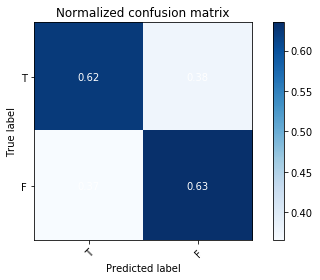

In [75]:
def plot_confusion_matrix(Y_test, Y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)
    # Only use the labels that appear in the data
    classes = ['T','F']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_test, Y_pred, classes=['T','F'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, Y_pred, classes=['T','F'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [72]:
X = df_up['contentAuthor']
Y = df_up['Ret']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
cvec = CountVectorizer(stop_words='english').fit(X_train)
df_train=pd.DataFrame(cvec.transform(X_train).todense(), columns=cvec.get_feature_names())
df_test=pd.DataFrame(cvec.transform(X_test).todense(), columns=cvec.get_feature_names())
a_train=pd.DataFrame(cvec.transform(X_train).todense(), columns=cvec.get_feature_names())
lr = LogisticRegression()
lr.fit(df_train, Y_train)
lr.score(df_test, Y_test)

0.6290589583598625

In [0]:
Y_pred = lr.fit(df_train, Y_train).predict(df_test)

Normalized confusion matrix
[[0.62 0.38]
 [0.37 0.63]]


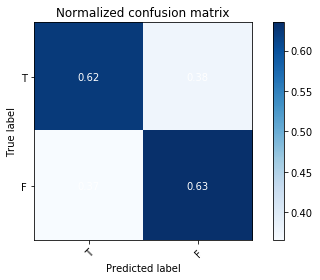

In [76]:
plot_confusion_matrix(Y_test, Y_pred, classes=['T','F'],
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues)


In [77]:
X = df_up['contentAuthor']
Y = df_up['Ret']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
cvec = CountVectorizer(stop_words='english').fit(X_train)
df_train=pd.DataFrame(cvec.transform(X_train).todense(), columns=cvec.get_feature_names())
df_test=pd.DataFrame(cvec.transform(X_test).todense(), columns=cvec.get_feature_names())
a_train=pd.DataFrame(cvec.transform(X_train).todense(), columns=cvec.get_feature_names())
lr = LogisticRegression(penalty='l1')
lr.fit(df_train, Y_train)
lr.score(df_test, Y_test)

0.6230739844645359

In [78]:
dfna

,accessedResources,adblockerStatus,aid,browser,browserId,city,content,contentAuthor,contentCreated,contentSection,country,countryCode,customParamList,customParams,dmaCode,fingerprint,globalBrowserId,hasAccess,hour,ip,isFirstVisit,isNewVisit,newsletter,node,operatingSystem,originalUrl,pageSessionId,pageViewId,parsedReferrer,parsedReferrerId,platform,rawReferrer,rawUserAgent,referrerSegment,referrerSegmentId,region,resourceIds,sailthruCookie,source,submissionCount,submitType,tags,timezoneOffset,uid,unixTimestamp,url,userAgent,visitId,d,Ret
2,[],0,XXXX,misc,V31r7/zlPytyE3sUN3Z4hA==,Brooklyn,"{'id': '', 'keywords': 'at work, leadership, c...",izzD7bDOhnwEE4GEC++AsA==,2018-08-28 13:50:14 UTC,At Work,United States,US,[],{},501,0GHj5Bt9Lbc38pZJF+bQCQ==,V31r7/zlPytyE3sUN3Z4hA==,0,0,0wrjci5hzxWPl+mcLwk5lw==,True,1.0,0,XXXX,ios,JZ4KhcQhO0a5Y37rOm7ZFw==,sTwjSW4gKieX3Hl1d/ujSA==,g2Nqdgva9680KGTj98ILOg==,other,12,mobile,RUYD/Vd040whQ0U3L/Tjfg==,Mozilla/5.0 (iPhone; CPU iPhone OS 12_1 like M...,external,3,New York,[],XXXX,composer,1,auto,[],-300,eFbmpJs3m4DilH0ieBqfjQ==,2018-12-01 00:00:00.031000+00:00,RtD9BZjjgIHlXTTlX2rzFg==,mim,VDeprRCrVjrm0tKgQr5Ljg==,1,False
5,[],0,XXXX,safari,tGKQ8Fo+bU2355xDa9Bo2w==,Wilmington,"{'id': '', 'keywords': 'some homepage, stock m...",1B2M2Y8AsgTpgAmY7PhCfg==,2013-07-12 14:06:54 UTC,US Homepage,United States,US,[],{},504,5Q6j5rJgUPDI4yDzVQiD4Q==,tGKQ8Fo+bU2355xDa9Bo2w==,0,0,o7XIWWPBSeyOw5tr5LgmLg==,True,1.0,0,XXXX,mac,FttRNoFDypsl62CXWFmlqw==,wgqZau2caECgO9nDn96HIg==,dQomBvxXEClBtTwTr17b2w==,none,13,desktop,2iu9I2HkRim3Dk3gBSXrow==,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_1...,direct,2,Delaware,[],XXXX,composer,1,auto,[],-300,eFbmpJs3m4DilH0ieBqfjQ==,2018-12-01 00:00:00.153000+00:00,w2l8mlrP0fpv8jaDnOLIEg==,dms,9IY1hZo3emSBdUoaktC4nQ==,1,True
8,[],0,XXXX,firefox,V7cbr/CGfSDsUYYzfIuFBA==,Newburgh,"{'id': '', 'keywords': 'autos, transportation,...",RAQgyv0WJMgHXF6Y0Oz0dQ==,2018-11-29 12:51:34 UTC,Autos,United States,US,[],{},501,0YDnpxkhXw6rlcBTAv8ZMA==,V7cbr/CGfSDsUYYzfIuFBA==,0,0,C5Q+5hDhAdeHZFWAhK7Qhg==,True,1.0,0,XXXX,windows,9yacwMKm05Gpo7F2hVybSg==,mIG/drVH9LWrFwcHpZOqyA==,M5zza7nJp0tXcB9C3VgAgw==,yahoo,6,desktop,lthjOx7eGoMJZJzQ9lZZQg==,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...,search,1,New York,[],XXXX,composer,1,auto,[],-300,eFbmpJs3m4DilH0ieBqfjQ==,2018-12-01 00:00:00.187000+00:00,+XywM7s92fqE5q83qzgHyw==,dwf,WOg5ssN7R7qLOpvpP7SmxA==,1,False
10,[],0,XXXX,chrome,kOH6c1scBdi9ASxtPwhXdw==,Atlanta,"{'id': '', 'keywords': 'health & science, jeni...",na6x+0883ollDRK6pHrqcg==,2018-11-30 22:15:14 UTC,Health & Science,United States,US,[],{},524,3QjDVQWl6DLBEDDwxvkT/w==,kOH6c1scBdi9ASxtPwhXdw==,0,0,BK46J6V5RzFE9b3FwkF1nQ==,True,1.0,0,XXXX,windows,t5pbqkBdBky8TzfOEzvd5Q==,c//ce6qEBGoFeM5dO/wAaQ==,AQT/ri1onAhQ0VByj8Eppw==,none,13,desktop,2iu9I2HkRim3Dk3gBSXrow==,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,direct,2,Georgia,[],XXXX,composer,1,auto,[],-300,eFbmpJs3m4DilH0ieBqfjQ==,2018-12-01 00:00:00.232000+00:00,o8RUF9UDYY/iOj3MmtUN3Q==,dwc,y/G0bFUEGoJY5M8L8nLb0A==,1,False
11,[],0,XXXX,chrome,fIzTAi8E6n2Vqz6Pc1es2w==,Outlook,"{'id': '', 'keywords': 'enterprise, investment...",ojEJJ61bWD0x2eE2iZN1sg==,2018-11-30 20:25:53 UTC,Enterprise,United States,US,[],{},810,5LJpHT3yHO9g8PWNAl1uMQ==,fIzTAi8E6n2Vqz6Pc1es2w==,0,0,d3y6J8BjF+Nf4mvbCG59zQ==,True,1.0,0,XXXX,android,nVGw2mlyNMQpF8X6VLv42w==,auwWzTYm6Is6WF4TJCtNNw==,BB6uF9a81WXPAhztFFGCiw==,drudgereport,7,mobile,m0lwQ56ud9I9kfz6qcU1Sw==,Mozilla/5.0 (Linux; Android 9; Pixel 2 XL) App...,external,3,Washington,[],XXXX,composer,1,auto,[],-480,eFbmpJs3m4DilH0ieBqfjQ==,2018-12-01 00:00:00.249000+00:00,au113aAwRc2HHR5TwNtGzg==,mac,OsJnvCHVaYy9C/Eq2c9J6w==,1,False
12,[],0,XXXX,safari,tJMeA6fDBeoVUoFtOYaEsw==,Tinley Park,"{'id': '', 'keywords': 'hotels restaurants and...",qhFnfSN7LCtDX9feysDXrQ==,2018-11-30 11:14:17 UTC,Hotels Restaurants and Leisure,United States,US,[],{},602,JLypTMdf2DyMCG2dh54LQg==,tJMeA6fDBeoVUoFtOYaEsw==,0,0,ENN90+0OecqCJYoiJb6KWA==,True

In [0]:
 #training on rowferrer
X = df_up['rawReferrer']
Y = df_up['Ret']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
cvec = CountVectorizer(stop_words='english').fit(X_train)
df_train=pd.DataFrame(cvec.transform(X_train).todense(), columns=cvec.get_feature_names())
df_test=pd.DataFrame(cvec.transform(X_test).todense(), columns=cvec.get_feature_names())
a_train=pd.DataFrame(cvec.transform(X_train).todense(), columns=cvec.get_feature_names())
a_test=pd.DataFrame(cvec.transform(X_test).todense(), columns=cvec.get_feature_names())




In [0]:
lr = LogisticRegression()
lr.fit(df_train, Y_train)
lr.score(df_test, Y_test)

In [0]:
lr = LogisticRegression(penalty='l2')
lr.fit(df_train, Y_train)
lr.score(df_test, Y_test)

In [0]:
Y_pred = lr.fit(df_train, Y_train).predict(df_test)


In [0]:
def plot_confusion_matrix(Y_test, Y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)
    # Only use the labels that appear in the data
    classes = ['T','F']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_test, Y_pred, classes=['T','F'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, Y_pred, classes=['T','F'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
dfna=df_up.dropna() #training on rowferrer
X = dfna['region']
Y = dfna['Ret']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
cvec = CountVectorizer(stop_words='english').fit(X_train)
df_train=pd.DataFrame(cvec.transform(X_train).todense(), columns=cvec.get_feature_names())
df_test=pd.DataFrame(cvec.transform(X_test).todense(), columns=cvec.get_feature_names())
a_train=pd.DataFrame(cvec.transform(X_train).todense(), columns=cvec.get_feature_names())
a_test=pd.DataFrame(cvec.transform(X_test).todense(), columns=cvec.get_feature_names())



In [0]:
lr = LogisticRegression()
lr.fit(df_train, Y_train)
lr.score(df_test, Y_test)

In [0]:
#new approach with 2 variables
X1=dfna['rawReferrer']
X2=dfna['contentAuthor']
Y=dfna['Ret']
X1.size

In [0]:
X2.size

In [0]:
X1=cvec.fit_transform(X1)

In [0]:
X1

In [0]:
X2=cvec.fit_transform(X2)

In [0]:
X2

In [0]:
from scipy.sparse import coo_matrix, vstack, hstack
X=hstack([X1, X2])

In [0]:
X

In [0]:
(X_train, X_test) = train_test_split(X)
(Y_train, Y_test) = train_test_split(Y)

In [0]:
X_train

In [0]:
X_test

In [0]:
Y

In [0]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

In [0]:
#new approach with 3 variables

In [0]:
X1=df_up['rawReferrer']
X2=df_up['contentAuthor']
X3=df_up['contentSection']
Y=df_up['Ret']

In [0]:
X1=cvec.fit_transform(X1)
X2=cvec.fit_transform(X2)

In [0]:
X3=cvec.fit_transform(X3)

In [0]:
from scipy.sparse import coo_matrix, vstack, hstack
X=hstack([X1, X2, X3])

In [0]:
(X_train, X_test) = train_test_split(X)
(Y_train, Y_test) = train_test_split(Y)

In [0]:
lr = LogisticRegression(penalty='l2')
lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

In [0]:
 #4 descriptors
dfna=df_up.dropna()
X1=dfna['rawReferrer']
X2=dfna['contentAuthor']
X3=dfna['city']
X4=dfna['contentSection']
Y=dfna['Ret']
X1=cvec.fit_transform(X1)
X2=cvec.fit_transform(X2)
X3=cvec.fit_transform(X3)
X4=cvec.fit_transform(X4)

In [0]:
from scipy.sparse import coo_matrix, vstack, hstack
X=hstack([X1, X2, X3, X4])

In [0]:
(X_train, X_test) = train_test_split(X)
(Y_train, Y_test) = train_test_split(Y)

In [0]:
lr = LogisticRegression(penalty='l1')
lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

In [0]:
#5 
dfna=df_up.dropna()
X1=dfna['rawReferrer']
X2=dfna['contentAuthor']
X3=dfna['city']
X4=dfna['contentSection']
X5=dfna['browser']
Y=dfna['Ret']
X1=cvec.fit_transform(X1)
X2=cvec.fit_transform(X2)
X3=cvec.fit_transform(X3)
X4=cvec.fit_transform(X4)
X5=cvec.fit_transform(X5)
from scipy.sparse import coo_matrix, vstack, hstack
X=hstack([X1, X2, X3, X4, X5])

In [0]:
(X_train, X_test) = train_test_split(X)
(Y_train, Y_test) = train_test_split(Y)

In [0]:
lr = LogisticRegression(penalty='l1')
lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

In [0]:
#6
dfna=df_up.dropna()
X1=dfna['rawReferrer']
X2=dfna['contentAuthor']
X3=dfna['city']
X4=dfna['contentSection']
X5=dfna['browser']
X6=dfna['parsedReferrer']
Y=dfna['Ret']
X1=cvec.fit_transform(X1)
X2=cvec.fit_transform(X2)
X3=cvec.fit_transform(X3)
X4=cvec.fit_transform(X4)
X5=cvec.fit_transform(X5)
from scipy.sparse import coo_matrix, vstack, hstack
X=hstack([X1, X2, X3, X4, X5])

In [0]:
(X_train, X_test) = train_test_split(X)
(Y_train, Y_test) = train_test_split(Y)
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

In [0]:

dfna=df_up.dropna()
X1=dfna['city']
X2=dfna['contentAuthor']
Y=dfna['Ret']
X1=cvec.fit_transform(X1)
X2=cvec.fit_transform(X2)
from scipy.sparse import coo_matrix, vstack, hstack
X=hstack([X1, X2])
(X_train, X_test) = train_test_split(X)
(Y_train, Y_test) = train_test_split(Y)
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)


In [0]:

dfna=df_up.dropna()
X1=dfna['city']
X2=dfna['contentAuthor']
Y=dfna['Ret']
X1=cvec.fit_transform(X1)
X2=cvec.fit_transform(X2)
from scipy.sparse import coo_matrix, vstack, hstack
X=hstack([X1, X2])
(X_train, X_test) = train_test_split(X)
(Y_train, Y_test) = train_test_split(Y)
lr = LogisticRegression(penalty='l1')
lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

In [0]:
Y_pred = classifier.fit(X_train, Y_train).predict(X_test)